In [ ]:
import matplotlib.pyplot as plotter_lib
import numpy as np
import PIL as image_lib
import tensorflow as tflow
from tensorflow.keras.layers import Flatten
from keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [40]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


In [41]:

data_directory = "/content/Data/train"


In [42]:
img_height,img_width=180,180
batch_size=32
train_ds = tflow.keras.preprocessing.image_dataset_from_directory(data_directory,validation_split=0.2,subset="training",seed=123,label_mode='categorical',image_size=(img_height, img_width),batch_size=batch_size)

Found 202 files belonging to 2 classes.
Using 162 files for training.


In [43]:
validation_ds = tflow.keras.preprocessing.image_dataset_from_directory(data_directory,validation_split=0.2,subset="validation",seed=123,label_mode='categorical',image_size=(img_height, img_width),batch_size=batch_size)

Found 202 files belonging to 2 classes.
Using 40 files for validation.


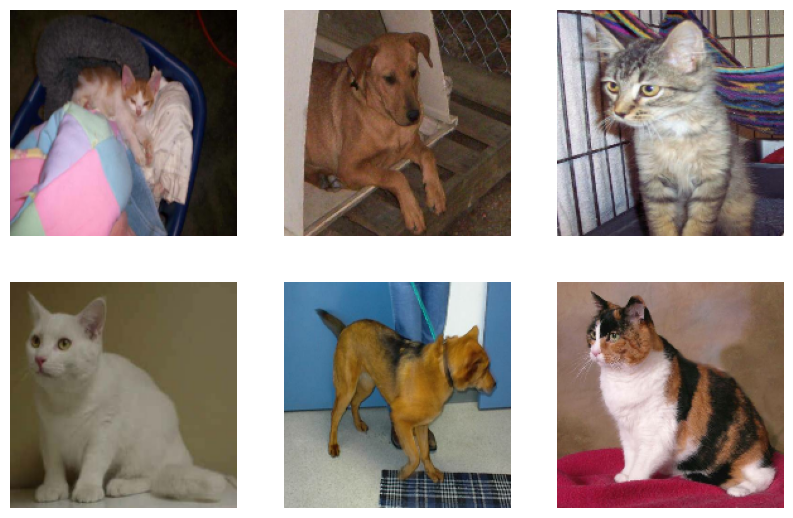

In [44]:
import matplotlib.pyplot as plt
plotter_lib.figure(figsize=(10, 10))
epochs=5

for images, labels in train_ds.take(1):
  for var in range(6):
    ax = plt.subplot(3, 3, var + 1)
    plotter_lib.imshow(images[var].numpy().astype("uint8"))
    plotter_lib.axis("off")


In [46]:
resnet_model = Sequential()

pretrained_model= tflow.keras.applications.ResNet50(include_top=False,

                   input_shape=(180,180,3),

                   pooling='avg',classes=2,

                   weights='imagenet')

for each_layer in pretrained_model.layers:

        each_layer.trainable=False

resnet_model.add(pretrained_model)

In [47]:
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation='relu'))
resnet_model.add(Dense(2, activation='softmax'))

In [48]:
resnet_model.compile(optimizer=Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])
history = resnet_model.fit(train_ds, validation_data=validation_ds, epochs=epochs)

Epoch 1/10
6/6 [==============================] - 21s 3s/step - loss: 2.5884 - accuracy: 0.5864 - val_loss: 1.5221 - val_accuracy: 0.6750
Epoch 2/10
6/6 [==============================] - 19s 3s/step - loss: 0.3403 - accuracy: 0.8765 - val_loss: 1.0492 - val_accuracy: 0.8000
Epoch 3/10
6/6 [==============================] - 23s 3s/step - loss: 0.3715 - accuracy: 0.8889 - val_loss: 0.4121 - val_accuracy: 0.8750
Epoch 4/10
6/6 [==============================] - 16s 3s/step - loss: 0.0899 - accuracy: 0.9630 - val_loss: 1.0144 - val_accuracy: 0.8250
Epoch 5/10
6/6 [==============================] - 20s 3s/step - loss: 0.1009 - accuracy: 0.9630 - val_loss: 0.4576 - val_accuracy: 0.8750
Epoch 6/10
6/6 [==============================] - 19s 3s/step - loss: 0.0104 - accuracy: 0.9938 - val_loss: 0.3998 - val_accuracy: 0.8750
Epoch 7/10
6/6 [==============================] - 20s 3s/step - loss: 0.0249 - accuracy: 0.9877 - val_loss: 0.3743 - val_accuracy: 0.8750
Epoch 8/10
6/6 [==================

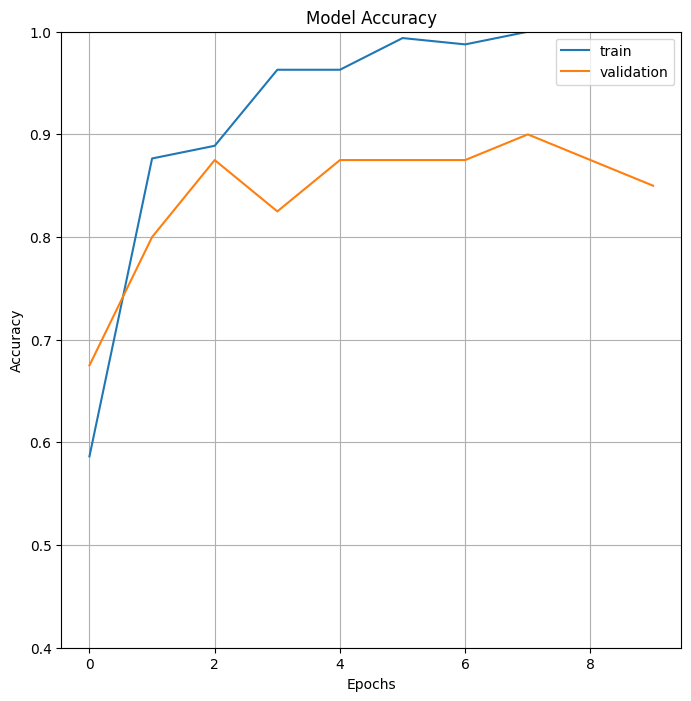

In [49]:
plotter_lib.figure(figsize=(8, 8))
epochs_range= range(epochs)
plotter_lib.plot( epochs_range, history.history['accuracy'], label="Training Accuracy")
plotter_lib.plot(epochs_range, history.history['val_accuracy'], label="Validation Accuracy")
plotter_lib.axis(ymin=0.4,ymax=1)
plotter_lib.grid()
plotter_lib.title('Model Accuracy')
plotter_lib.ylabel('Accuracy')
plotter_lib.xlabel('Epochs')
plotter_lib.legend(['train', 'validation'])
plotter_lib.savefig('output-plot.png')

In [51]:
import cv2
test_image=cv2.imread("/content/drive/MyDrive/train/Cats/cat.0.jpg")
test_image_resized= cv2.resize(test_image, (img_height,img_width))
test_image=np.expand_dims(test_image_resized,axis=0)

In [52]:
image_pred=resnet_model.predict(test_image)

1/1 [==============================] - 1s 1s/step


In [53]:
class_names = ["Cat","Dog"]

In [54]:
image_output_class=class_names[np.argmax(image_pred)]
print("The predicted class is", image_output_class)

The predicted class is Cat
